"""
Data Fields :

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
"""

In [135]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

local_path= "C:/Users/majay/Desktop/Python"

In [216]:
# Opening the dataset

data = 'C:/Users/Ajay/Desktop/Python/bikeshare.csv'
bikes = pd.read_csv(data, index_col='datetime', parse_dates=True)

In [217]:
# Displaying top5 rows
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [219]:
# Knowing how many rows and columns are there in our data set
bikes.shape

(10886, 11)

In [138]:
# Check the data types

bikes.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [139]:
# **Lets check the features now**

In [140]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace=True)

In [141]:
#Check if there are any null values (NAN) in the data set

bikes.isnull().any()

season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
total         False
dtype: bool

In [142]:
#There are no null values in the dataset

## Visualizing the data

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

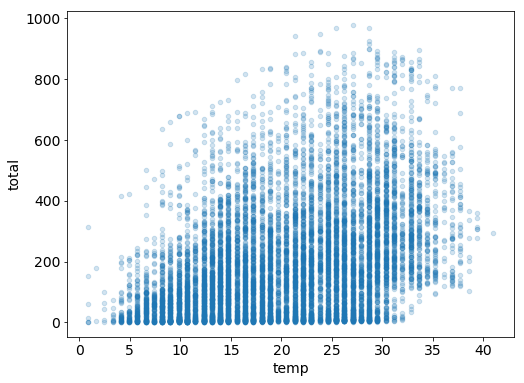

In [144]:
# Pandas scatter plot with temperature and total as axis.
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

In [145]:
# from the above scatter plot u can see more number of bikes have been rented between 18 degree and 33 degree

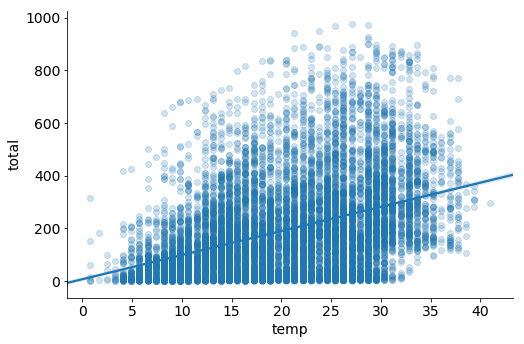

In [146]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

## Building a linear regression model

In [147]:
# create X and y ( inputs and outputs)
# consider only single variable as input feature
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [148]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

6.04621295962
[ 9.17054048]


In [150]:
"""
the intercept : means its the value of y when x=0.
Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
But it does not always make sense to interpret the intercept.""" 

"""
Coefficient :
It is the change in y divided by change in x, or the "slope".
Thus, a temperature increase of 1 degree Celsius is associated with a rental increase of 9.17 bikes.
"""


'\nCoefficient :\nIt is the change in y divided by change in x, or the "slope".\nThus, a temperature increase of 1 degree Celsius is associated with a rental increase of 9.17 bikes.\n'

## Visualizing the data (part 2)

In [151]:
# Let us explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

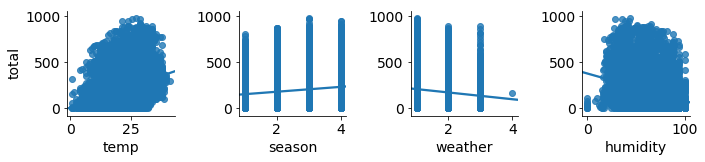

In [152]:
# Creating multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

In [153]:
""" Season : Here u can see more no. of bikes hired in season 3 and 4 which is fall and winter. Normally in winter people 
doesnt use more bikes. So here what we can predict is may be its the transition from fall to 
winter due which there are more no. of bikes in winter as well"""

""" Weather : u can see more no. of bikes hired in weather 1 which is Clear, Few clouds, Partly cloudy, Partly cloudy and
it makes sense.
"""

' Weather : u can see more no. of bikes hired in weather 1 which is Clear, Few clouds, Partly cloudy, Partly cloudy and\nit makes sense.\n'

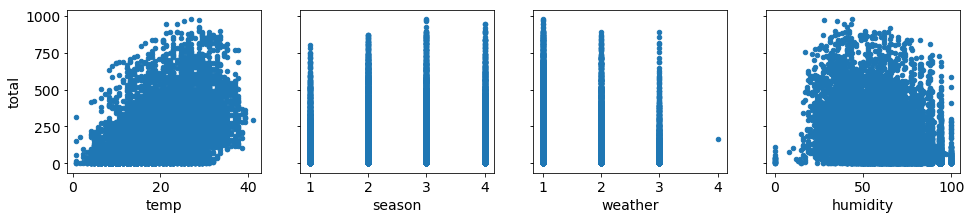

In [154]:
# We can plot the graph using pandas as well
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

In [155]:
# cross-tabulation of season and month : Lets see how many bikes were rented in terms of season and month
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


C:\Users\Ajay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


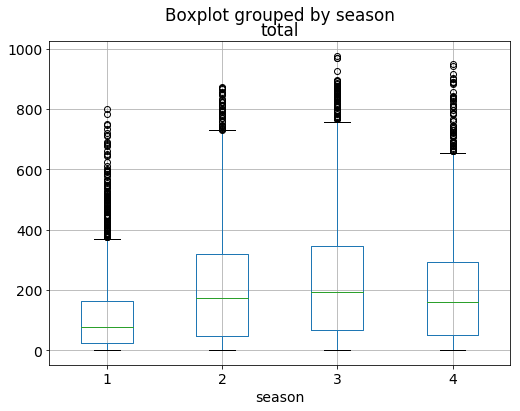

In [156]:
# Lets create a box plot to see how many bikes were rented in terms of season 
bikes.boxplot(column='total', by='season')

In [157]:
"""Here what we can observe is :
A line can't capture a non-linear relationship as 
There are more rentals in winter than in spring (?)"""


"Here what we can observe is :\nA line can't capture a non-linear relationship as \nThere are more rentals in winter than in spring (?)"

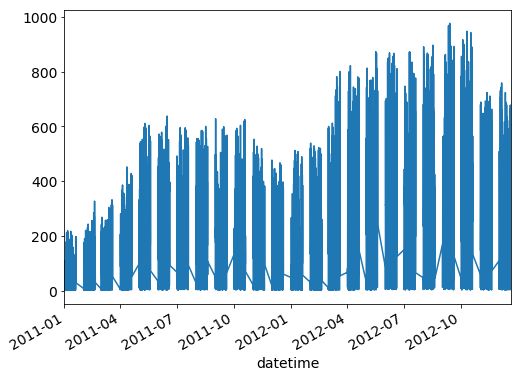

In [158]:
# Lets draw the line plot of rentals
bikes.total.plot()

In [159]:
"""From the above plot we can say that There are more rentals in the winter than the spring, but only because the system is
experiencing overall growth and the winter months happen to come after the spring months"""


'From the above plot we can say that There are more rentals in the winter than the spring, but only because the system is\nexperiencing overall growth and the winter months happen to come after the spring months'

In [160]:
# lets check the correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


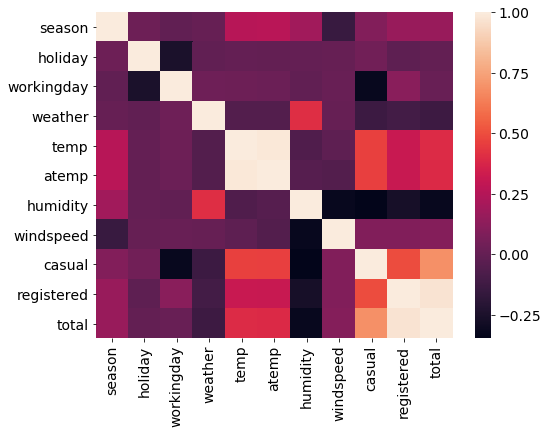

In [161]:
# visualizing the correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

In [162]:
#  Here strong corelation exists between 1. registered and Total and 2.temp and atemp
# temo and atemp need not be considered as its both are related to one another but between registered and total should be checked


In [163]:
# Lets add more features to the model

In [164]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [165]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

159.520687861
[  7.86482499  22.53875753   6.67030204  -3.11887338]


In [166]:
# pair the feature names with the coefficients using zip function
zip(feature_cols, linreg.coef_)

In [167]:
"""
Interpreting the coefficients:
Holding all other features fixed, a 1 unit increase in temperature is associated with a rental increase of 7.86 bikes.
Holding all other features fixed, a 1 unit increase in season is associated with a rental increase of 22.5 bikes.
Holding all other features fixed, a 1 unit increase in weather is associated with a rental increase of 6.67 bikes.
Holding all other features fixed, a 1 unit increase in humidity is associated with a rental decrease of 3.12 bikes.

Note that weather and season are categorical. Hence we cant say the above is true for them.
"""

'\nInterpreting the coefficients:\nHolding all other features fixed, a 1 unit increase in temperature is associated with a rental increase of 7.86 bikes.\nHolding all other features fixed, a 1 unit increase in season is associated with a rental increase of 22.5 bikes.\nHolding all other features fixed, a 1 unit increase in weather is associated with a rental increase of 6.67 bikes.\nHolding all other features fixed, a 1 unit increase in humidity is associated with a rental decrease of 3.12 bikes.\n\nNote that weather and season are categorical. Hence we cant say the above is true for them.\n'

## Comparing models with train/test split and RMSE

In [133]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [122]:
# compare different sets of features
from sklearn import metrics
print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print (train_test_rmse(['temp', 'season', 'weather']))
print (train_test_rmse(['temp', 'season', 'humidity']))

155.649459131
164.165399763
155.598189367


In [ ]:
# Here you need to consider the least RMSE value which is the temp, season and humidity

In [125]:
# We cant consider casual and registered as they doesnt make any sense.
print (train_test_rmse(['casual', 'registered']))

1.06014288803e-13


In [ ]:
"""handling categorical variables 
Here we have 2 categorical variables. weather and season
We will use dummy encoding method to convert categorical to numerical values
"""


In [169]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


In [ ]:
# always when there are n dummy variables, we would need only n-1 variables. Hence remove one from existing

In [170]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In [171]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [174]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
zip(feature_cols, linreg.coef_)
print(feature_cols,linreg.coef_)

['temp', 'season_2', 'season_3', 'season_4', 'humidity'] [ 11.18640586  -3.3905431  -41.73686071  64.41596147  -2.81948164]


In [ ]:
"""Holding all other features fixed, summer is associated with a rental decrease of 3.39 bikes compared to the spring.
Holding all other features fixed, fall is associated with a rental decrease of 41.7 bikes compared to the spring.
Holding all other features fixed, winter is associated with a rental increase of 64.4 bikes compared to the spring."""

In [176]:
# compare original season variable with dummy variables
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

155.598189367
154.333945936


In [ ]:
# you see an improvement in the rmse value 

## Feature engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

In [177]:
# hour as a numeric feature
bikes['hour'] = bikes.index.hour

In [178]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)

In [179]:
# daytime as a categorical feature
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)

In [181]:
print (train_test_rmse(['hour']))
print (train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print (train_test_rmse(['daytime']))

165.671742641
128.311205028
144.891163602


In [214]:
print (train_test_rmse(['daytime','temp']))
print (train_test_rmse(['daytime','temp','humidity']))
print (train_test_rmse(['daytime','temp','humidity','season_2', 'season_3',]))
print (train_test_rmse(['daytime','temp','humidity','season_3']))
print (train_test_rmse(['temp','season_2','season_3','humidity']))
print (train_test_rmse(['daytime','temp','humidity','season_2', 'season_3','windspeed']))
print (train_test_rmse(['daytime','temp','humidity','season_3','windspeed']))
print (train_test_rmse(['daytime','temp','humidity','season_2','windspeed']))
print (train_test_rmse(['daytime','humidity','windspeed','temp','season_2']))

134.985019317
132.896023512
132.657725365
132.611238811
155.808639769
132.410241523
132.366112291
132.619497237
132.619497237
